# The Density Matrix

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit.result import Result
from qiskit.quantum_info import Statevector, Operator
from math import sqrt, pi

### use vector_to_latex code from qiskit 0.44
from vector_to_latex import *

In [3]:
from qiskit.quantum_info import DensityMatrix

## Single-qubit system

The density matrix of a state $\psi$ is $\rho = |\psi\rangle \langle\psi|$, for a pure state.

* The density matrix has unit trace, $Tr(\rho)=1$
* $\rho^\dagger = \rho$
* $\rho^2 = \rho$ for a pure state and therefore $Tr(\rho^2)=1$
* The density matrix is positive semi-definite.

> A matrix $P$ is positive semidefinite if and only if $P$ is Hermitian (i.e., equal to its own conjugate transpose, $\rho^\dagger = \rho$) and all of its eigenvalues are nonnegative real numbers. Or, a matrix $P$ is positive semidefinite if and only if $\langle\psi|P|\psi\rangle \geq 0$ for every complex vector $|\psi\rangle$ having the same indices as $P$. It means there exists a matrix $M$ such that $P = M^\dagger M$. The positive define matrix is $\langle\psi|P|\psi\rangle \gt 0$ for every complex vector $|\psi\rangle$ having the same indices as $P$.



The states $|0\rangle$ and $|1\rangle$ are obviously pure. For example,

$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\langle 0 | = \begin{bmatrix} 1 & 0 \end{bmatrix}$; $|0\rangle\langle 0 | = \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix}$.

The trace of $\rho = \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix}$ is obviously 1 and there's nothing complex or non-negative about it. As density matrices, pure states always have one eigenvalue equal to 1 and all other eigenvalues equal to 0. 

The state $|+\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)$ is also pure:

$|+\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$; $p = |+\rangle \langle+| = \frac{1}{2} \begin{bmatrix} 1 & 1 \\ 1 & 1\end{bmatrix}$.

$p^2 = \frac{1}{4} \begin{bmatrix} 1 & 1 \\ 1 & 1\end{bmatrix} \begin{bmatrix} 1 & 1 \\ 1 & 1\end{bmatrix} = \frac{1}{4} \begin{bmatrix} 1+1 & 1+1 \\ 1+1 & 1+1 \end{bmatrix}  = \frac{1}{2} \begin{bmatrix} 1 & 1 \\ 1 & 1\end{bmatrix} = p$

In fact all the states which lie on the Bloch sphere are pure.

But if we consider an equal *statistical* mix of $|0\rangle$ and $|1\rangle$, such as if we had an ensemble of qubits rather than a single qubit in superposition, its density matrix is constructed via

$\rho = \sum_i p_i |\psi_i\rangle \langle \psi_i|$ such that $\sum_i p_i = 1$

so 

$\rho = \frac{1}{2}|0\rangle +  \frac{1}{2}|1\rangle = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 & 0 \\ 0 & 1\end{bmatrix} = \frac{1}{2}\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$.

$\rho^2 = \frac{1}{4}\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} \neq \rho$ so this is not a pure state. Its purity is $\mathrm{Tr}(\rho^2) = \frac{1}{2}$.

In general, states which are not pure are *inside* the Bloch sphere rather than on its surface. This completely mixed state is actually at the centre of the Bloch sphere.

https://learning.quantum.ibm.com/course/general-formulation-of-quantum-information/density-matrices

we can generate density matrices by *Statevector* package and *DensityMatrix* package

In [6]:
# Define and display examples of density matrices
# using the Statevector package

ket_0 = Statevector.from_label('0')
ket_1 = Statevector.from_label('1')
ket_plus = Statevector.from_label('+')
ket_minus = Statevector.from_label('-')
ket_iplus = Statevector.from_label('r')
ket_iminus = Statevector.from_label('l')
v = Statevector([(1 + 2j) / 3, -2 / 3])

display(array_to_latex(ket_0.to_operator()))
display(array_to_latex(ket_1.to_operator()))
display(array_to_latex(ket_plus.to_operator()))
display(array_to_latex(ket_minus.to_operator()))
display(array_to_latex(ket_iplus.to_operator()))
display(array_to_latex(ket_iminus.to_operator()))
display(array_to_latex(v.to_operator()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# Define and display examples of density matrices
# using the DensityMatrix package

rho_0 = DensityMatrix.from_label('0')
rho_1 = DensityMatrix.from_label('1')
rho_plus = DensityMatrix.from_label('+')
rho_minus = DensityMatrix.from_label('-')
rho_iplus = DensityMatrix.from_label('r')
rho_iminus = DensityMatrix.from_label('l')

display(rho_0.draw('latex'))
display(rho_1.draw('latex'))
display(rho_plus.draw('latex'))
display(rho_minus.draw('latex'))
display(rho_iplus.draw('latex'))
display(rho_iminus.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
# we can check the eigenvalues of a density matrix
import numpy as np
#linaglg is the abbr. of linear algebra, linalg.eig contains eigvals and eigenvector
from numpy import linalg
display(array_to_latex(np.sort(linalg.eigvals(rho_plus))[::-1]))

# check it's purity, defined as the trace of rho^2
print(rho_plus.purity())

<IPython.core.display.Latex object>

(0.9999999999999996+0j)


pure state has the eigenvalues equals to $\{1,0,... \}$  and $Tr(\phi^2)=1$ equals to the eigenvalues equals to 1 and 0. The eigenvalues of mix states
are $\geq$ 0 because of the semi-definite matrix

# Two-qubit systems

The state $|00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$ so its density matrix is $\rho = \begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0\end{bmatrix}$.

Since $|00\rangle = |0\rangle \otimes  |0\rangle$ we can also consider the density matrix of $|00\rangle$ as the tensor product of the density matrices of $|0\rangle$ and $|0\rangle$.

$\begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0\end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix} \otimes \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix} = \begin{bmatrix} 1\times\begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix} & 0\times\begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix} \\ 0\times\begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix} & 0\times\begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix}\end{bmatrix}$

The density matrix of $|11\rangle$ is $\rho = \begin{bmatrix} 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 1\end{bmatrix}$.

## Entangled states

The maximally-entangled state $|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$ cannot be expressed as a tensor product. Its density matrix is given by

$\rho = |\phi^+\rangle \langle\phi^+| = \frac{1}{2} \left(|00\rangle + |11\rangle\right)\left(\langle00| + \langle11|\right)  = \frac{1}{2} \left(|00\rangle\langle00| + |11\rangle\langle00| + |00\rangle\langle11| + |11\rangle\langle11|\right)$

$\rho = \frac{1}{2} \left( \begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0\end{bmatrix} +\begin{bmatrix} 0 && 0 && 0 && 1 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0\end{bmatrix}+\begin{bmatrix} 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 1 && 0 && 0 && 0\end{bmatrix}+\begin{bmatrix} 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 1\end{bmatrix}\right)$

$\rho = \frac{1}{2} \begin{bmatrix} 1 && 0 && 0 && 1 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 1 && 0 && 0 && 1\end{bmatrix}$

We can see that this is different to classically mixing $|00\rangle$ and $|11\rangle$ which would give

$\rho = \frac{1}{2} \begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 1\end{bmatrix}$


## Reduced states and partial trace 

$\rho = |\psi\rangle \langle \psi|$ is the density matrix of a system of two-qubits, $A$ and $B$.

The statevector $|\psi\rangle$ can be expressed as

$|\psi\rangle = \sum_b |\phi_b\rangle \otimes |b\rangle$ for some collection of vectors $|\phi_b\rangle$ of the state of $B$.

$|\phi_b\rangle = \left(I_A \otimes \langle b| \right)|\psi\rangle$ in which $I_A$ is the identity on $A$. By averaging over the states according to their probabilities we eventually arrive at the density matrix of the state $A$ in isolation:

$\rho_A = \sum_b \left(I_A \otimes \langle b| \right)|\psi\rangle \langle \psi|\left(I_A \otimes |b\rangle \right)  = \sum_b \left(I_A \otimes \langle b| \right) \rho \left(I_A \otimes |b\rangle \right) $

This operation is also known as the *partial trace*:

$\rho_A = \mathrm{Tr}_B(\rho) = \sum_b \left(I_A \otimes \langle b| \right) \rho \left(I_A \otimes |b\rangle \right) $

In this case $B$ has been "traced out". The *partial trace* on $A$ would be:

$\rho_B = \mathrm{Tr}_A(\rho) = \sum_a \left(\langle a| \otimes I_B \right) \rho \left( |a\rangle \otimes I_B\right) $

$\textbf{Partial trace in a two-qubit system}$

In general if $\rho = \begin{bmatrix} \alpha_{00} & \alpha_{01} & \alpha_{02} & \alpha_{03} \\
\alpha_{10} & \alpha_{11} & \alpha_{12} & \alpha_{13} \\
\alpha_{20} & \alpha_{21} & \alpha_{22} & \alpha_{23} \\
\alpha_{30} & \alpha_{31} & \alpha_{32} & \alpha_{33} \end{bmatrix}$

$|a\rangle \otimes I_B = \begin{bmatrix}a_0 \\ a_1\end{bmatrix} \otimes \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix}a_0 & 0 \\ 0 & a_0 \\ a_1 & 0 \\ 0 & a_1 \end{bmatrix}$

$\rho \left(|a\rangle \otimes I_B \right)= \begin{bmatrix} \alpha_{00} & \alpha_{01} & \alpha_{02} & \alpha_{03} \\
\alpha_{10} & \alpha_{11} & \alpha_{12} & \alpha_{13} \\
\alpha_{20} & \alpha_{21} & \alpha_{22} & \alpha_{23} \\
\alpha_{30} & \alpha_{31} & \alpha_{32} & \alpha_{33} \end{bmatrix} \begin{bmatrix}a_0 & 0 \\ 0 & a_0 \\ a_1 & 0 \\ 0 & a_1 \end{bmatrix} =
\begin{bmatrix}\alpha_{00} a_0 + \alpha_{02} a_1 & \alpha_{01} a_0 + \alpha_{03} a_1 \\ \alpha_{10} a_0 + \alpha_{12} a_1 & \alpha_{11} a_0 + \alpha_{13} a_1 \\ \alpha_{20} a_0 + \alpha_{22} a_1 & \alpha_{21} a_0 + \alpha_{23} a_1 \\ \alpha_{30} a_0 + \alpha_{32} a_1 & \alpha_{31} a_0 + \alpha_{33} a_1 \end{bmatrix}$

$\langle a | \otimes I_B = \begin{bmatrix}a^*_0 & a^*_1\end{bmatrix} \otimes \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix}a^*_0 & 0 & a^*_1 & 0\\ 0 & a^*_0 & 0 & a^*_1 \end{bmatrix}$

$(\langle a | \otimes I_B)\rho \left(|a\rangle \otimes I_B \right) =
\begin{bmatrix}a^*_0 & 0 & a^*_1 & 0\\ 0 & a^*_0 & 0 & a^*_1 \end{bmatrix}
\begin{bmatrix}
\alpha_{00} a_0 + \alpha_{02} a_1 & \alpha_{01} a_0 + \alpha_{03} a_1 \\
\alpha_{10} a_0 + \alpha_{12} a_1 & \alpha_{11} a_0 + \alpha_{13} a_1 \\
\alpha_{20} a_0 + \alpha_{22} a_1 & \alpha_{21} a_0 + \alpha_{23} a_1 \\
\alpha_{30} a_0 + \alpha_{32} a_1 & \alpha_{31} a_0 + \alpha_{33} a_1 \end{bmatrix}
= \begin{bmatrix} a^*_0 (\alpha_{00} a_0 + \alpha_{02} a_1) + a^*_1 (\alpha_{20} a_0 + \alpha_{22} a_1) & a^*_0 (\alpha_{01} a_0 + \alpha_{03} a_1) + a^*_1 (\alpha_{21} a_0 + \alpha_{23} a_1) \\
a^*_0 (\alpha_{10} a_0 + \alpha_{12} a_1) + a^*_1 (\alpha_{30} a_0 + \alpha_{32} a_1) & a^*_0 (\alpha_{11} a_0 + \alpha_{13} a_1) + a^*_1 (\alpha_{31} a_0 + \alpha_{33} a_1) \end{bmatrix}$

For simplicity we will sum over the computational basis states of $A$ but any two orthogonal states will work. This means that we have either $a_0 = 0$, $a_1 = 1$ or $a_0 = 1$, $a_1 = 0$. 

Consider the term $a^*_0 (\alpha_{00} a_0 + \alpha_{02} a_1) + a^*_1 (\alpha_{20} a_0 + \alpha_{22} a_1)$. This becomes $\alpha_{00} + \alpha_{22}$. Keeping only terms in $a^2_0 = 1$ or $a^2_1 = 1$ leaves:

$\rho_B = \mathrm{Tr}_A(\rho) = \begin{bmatrix} \alpha_{00} + \alpha_{22} & \alpha_{01} + \alpha_{23} \\ \alpha_{10} + \alpha_{32} & \alpha_{11} + \alpha_{33} \end{bmatrix}$

We can do something similar to show that 

$\rho_A = \mathrm{Tr}_B(\rho) = \begin{bmatrix} \alpha_{00} + \alpha_{11} & \alpha_{02} + \alpha_{13} \\ \alpha_{20} + \alpha_{31} & \alpha_{22} + \alpha_{33} \end{bmatrix}$


## Application to entangled states

Consider a separable state such as $|\psi\rangle = |1\rangle \otimes |+\rangle = |1+\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 1 \end{bmatrix}$

Its density matrix is $\rho = |\psi\rangle \langle\psi| = |1\rangle\langle 1| \otimes |+\rangle\langle +| = \begin{bmatrix} 0 & 0 \\ 0 & 1\end{bmatrix} \otimes \begin{bmatrix} ½ & ½ \\ ½ & ½\end{bmatrix} = \begin{bmatrix} 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && ½ && ½ \\ 0 && 0 && ½ && ½\end{bmatrix} $

$\rho_A = \mathrm{Tr}_B(\rho) = \begin{bmatrix} 0 & 0 \\ 0 & ½+½ \end{bmatrix} = \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}$

$\rho_B = \mathrm{Tr}_A(\rho) = \begin{bmatrix} ½ & ½ \\ ½ & ½ \end{bmatrix}$

We obtain the density matrices of the individual pure states. So whatever measurement happens to the other qubit, we still keep the qubit we are looking at in whatever state it was in.

Now consider the entangled state $|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$ which has the density matrix we calculated above:

$\rho = |\phi^+\rangle \langle\phi^+| = \frac{1}{2} \begin{bmatrix} 1 && 0 && 0 && 1 \\ 0 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 \\ 1 && 0 && 0 && 1\end{bmatrix}$

$\rho_A = \mathrm{Tr}_B(\rho) = \frac{1}{2}\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

$\rho_B = \mathrm{Tr}_A(\rho) = \frac{1}{2}\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

These are not pure states, they are the states which come from a equal statistical mix of $|0\rangle$ and $|1\rangle$. It's as if we're saying that if we had an ensemble of two-qubit systems in this entangled state and tried to measure one of the qubits, we'd end up with a statistical mix of $|0\rangle$ and $|1\rangle$ on the other one. Knocking one of our qubits out of a pure state into a mixed state like this when we trace over the other one is a sign of entanglement between the qubits.

Here we demonstrate that we can obtain the density matrix of a quantum circuit, and check the purities of the reduced density matrices (the traces of $\rho_A^2$ or $\rho_B^2$) to see if the qubits were entangled. We also look at $\rho_A^2$ and $\rho_A$ etc. to see if they are the same.

In [13]:
from qiskit.quantum_info import partial_trace

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
display(Statevector(qc).draw(output='latex',prefix="\\psi ="))
rho=DensityMatrix(qc)
display(rho.draw('latex',prefix="\\rho = "))

rhoA=partial_trace(rho, [0])
rhoB=partial_trace(rho, [1])

display(rhoA.draw(output='latex',prefix="\\rho_A = "))
display(rhoB.draw(output='latex',prefix="\\rho_B = "))

print(rhoA.data)
print(np.trace((rhoA.data)@(rhoA.data))) #the @ is the matrix product
print(rhoA.purity())

print(rhoB.data)
print((rhoB.data)@(rhoB.data))
print(rhoB.purity())


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
(0.9999999999999996+0j)
(0.9999999999999996+0j)
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
(0.9999999999999996+0j)


In [15]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw())
display(Statevector(qc).draw(output='latex',prefix="\\phi^+ ="))
rho=DensityMatrix(qc)
display(rho.draw('latex',prefix="\\rho = "))

rhoA=partial_trace(rho, [0])
rhoB=partial_trace(rho, [1])

display(rhoA.draw(output='latex',prefix="\\rho_A = "))
display(rhoB.draw(output='latex',prefix="\\rho_B = "))

print(rhoA.data)
print(np.trace((rhoA.data)@(rhoA.data)))
print(rhoA.purity())

print(rhoB.data)
print((rhoB.data)@(rhoB.data))
print(rhoB.purity())

#For a 2-state system, the purity is 1/2 when the states are completely mixed.

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
(0.4999999999999998+0j)
(0.4999999999999998+0j)
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
[[0.25+0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j]]
(0.4999999999999998+0j)


### Quantifying entanglement

Entanglement of a two-state system can be quantified by referring to *Schmidt decomposition* but this will not be covered. But let's look at the entanglement of the controlled-$\phi$ operation(when control qubit equals to $|1\rangle$, the target qubit multiple the phase $e^{i\phi}$ ) on the $|++\rangle$ state:

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ H ├─■───────
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

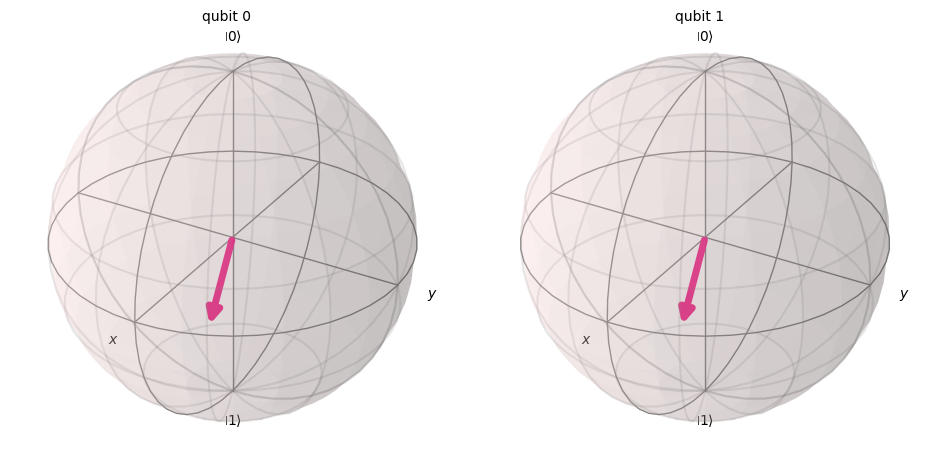

<IPython.core.display.Latex object>

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cp(pi/4,0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))
rho = DensityMatrix(qc)
display(rho.draw('latex',prefix="\\rho = "))

In [23]:
# the reduce density matrices are:

rhoA = partial_trace(rho,[0])
rhoB = partial_trace(rho,[1])

display(rhoA.draw('latex',prefix="\\rho_A = "))
display(rhoB.draw(output='latex',prefix="\\rho_B = "))

#print(rhoA.data)
#print(rhoB.data)
#print(np.trace((rhoA.data)@(rhoA.data)))
print(rhoA.purity())
#print((rhoB.data)@(rhoB.data))
print(rhoB.purity())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(0.9267766952966363+0j)
(0.9267766952966363+0j)


They have purity slightly less than 1, which is why the Bloch vectors are somewhere inside the Bloch sphere rather than on its surface.

We can play with different values of $\phi$ to see how the purity changes, being a maximum of 1 for $\phi = 0$ (or any multiple of $2\pi$) and a minimum of $\frac{1}{2}$ for $\phi=\pi$:

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/2) 
q_1: ┤ H ├─■───────
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

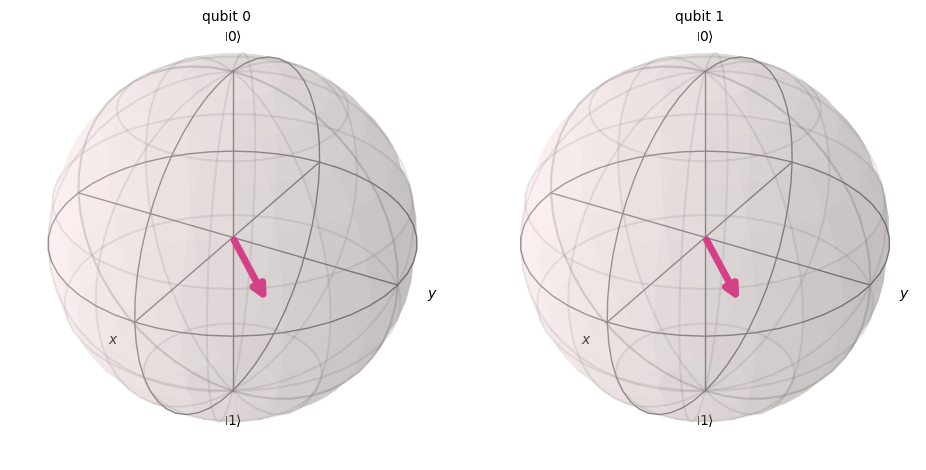

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(0.7499999999999996+0j)
(0.7499999999999996+0j)


In [26]:
phi = pi/2
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cp(phi,0,1)
state = Statevector(qc)

display(qc.draw())
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

rho=DensityMatrix(qc)
rhoA=partial_trace(rho, [0])
rhoB=partial_trace(rho, [1])

display(rho.draw('latex',prefix="\\rho = "))
display(rhoA.draw(output='latex',prefix="\\rho_A = "))
display(rhoB.draw(output='latex',prefix="\\rho_B = "))

#print(rhoA.data)
#print(rhoB.data)
#print((rhoA.data)@(rhoA.data))
print(rhoA.purity())
#print((rhoB.data)@(rhoB.data))
print(rhoB.purity())

We can also try controlling a $CX$ operation using a state which is not an equal superposition of $|0\rangle$ and $|1\rangle$. We use an $RY$ gate to rotate by $\theta = \varepsilon \pi$ about the $y$ axis, from $|0\rangle$ to $|+\rangle$ to $|1\rangle$.

┌─────────┐     
q_0: ┤ Ry(π/4) ├──■──
     └─────────┘┌─┴─┐
q_1: ───────────┤ X ├
                └───┘

State before CX:


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

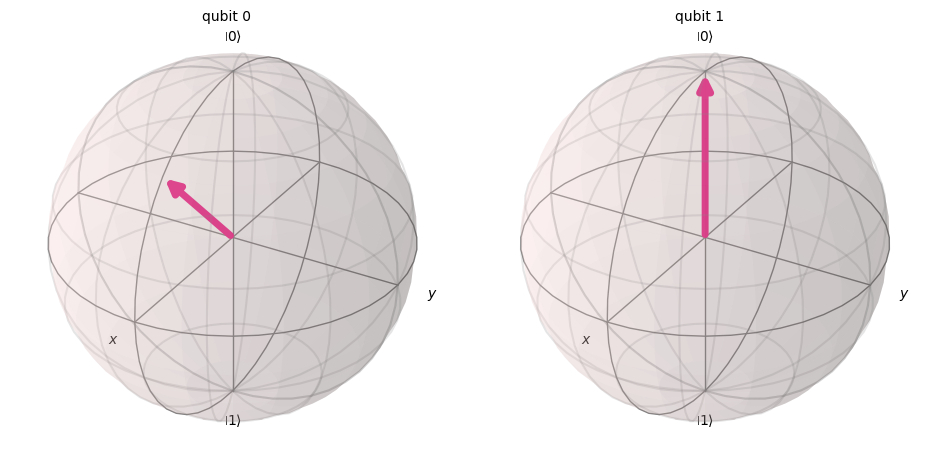

State after CX:


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

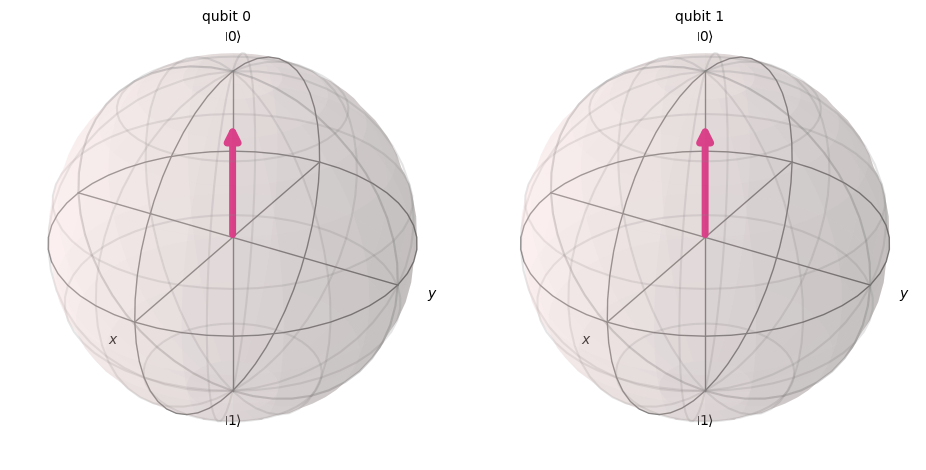

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(0.75+0j)
(0.75+0j)


In [29]:
eps = 0.25
qc = QuantumCircuit(2)
qc.ry(pi*eps,0)   #pi/4
prestate = Statevector(qc)
qc.cx(0,1)
state = Statevector(qc)
display(qc.draw())

print('State before CX:')
display(prestate.draw(output = 'latex'))
display(Math(vector_to_latex(prestate)))
display(prestate.draw(output = 'bloch'))

print('State after CX:')
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

rho=DensityMatrix(qc)
rhoA=partial_trace(rho, [0])
rhoB=partial_trace(rho, [1])

display(rho.draw('latex',prefix="\\rho = "))
display(rhoA.draw(output='latex',prefix="\\rho_A = "))
display(rhoB.draw(output='latex',prefix="\\rho_B = "))

#print(rhoA.data)
#print(rhoB.data)
#print((rhoA.data)@(rhoA.data))
print(rhoA.purity())
#print((rhoB.data)@(rhoB.data))
print(rhoB.purity())

 The unitary of the $RY(\theta)$ is 
$\begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2)\\ \end{bmatrix}$

and if applied to $q_0$ in a two-qubit circuit, the unitary becomes $\begin{bmatrix} RY & 0 \\ 0 & RY\\ \end{bmatrix} = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) & 0 & 0 \\ \sin(\theta/2) & \cos(\theta/2) & 0 & 0\\  0 & 0 & \cos(\theta/2) & -\sin(\theta/2) \\ 0 & 0 & \sin(\theta/2) & \cos(\theta/2)\\\end{bmatrix}$

The application of the $CX$ on this is $$\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ \end{bmatrix} \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) & 0 & 0 \\ \sin(\theta/2) & \cos(\theta/2) & 0 & 0\\  0 & 0 & \cos(\theta/2) & -\sin(\theta/2) \\ 0 & 0 & \sin(\theta/2) & \cos(\theta/2) \\ \end{bmatrix} = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) & 0 & 0 \\
                 0 & 0 & \sin(\theta/2) & \cos(\theta/2) \\
                0 & 0 & \cos(\theta/2) & -\sin(\theta/2) \\
                \sin(\theta/2) & \cos(\theta/2) & 0 & 0 \\
\end{bmatrix}$$

so this acts on our initial state $|00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

to give
$$\begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) & 0 & 0 \\
                 0 & 0 & \sin(\theta/2) & \cos(\theta/2) \\
                0 & 0 & \cos(\theta/2) & -\sin(\theta/2) \\
                \sin(\theta/2) & \cos(\theta/2) & 0 & 0 \\
\end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} \cos(\theta/2) \\ 0 \\ 0 \\ \sin(\theta/2) \end{bmatrix}$$
which is $$|\psi\rangle = \cos(\theta/2) |00\rangle + \sin(\theta/2) |11\rangle$$



#### The density matrix of this state is 

$\rho = |\psi\rangle \langle \psi| = \begin{bmatrix} \cos^2(\theta/2) & 0 & 0 & \sin(\theta/2)\cos(\theta/2) \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\sin(\theta/2)\cos(\theta/2) & 0 & 0 & \sin^2(\theta/2) \\
\end{bmatrix} = \begin{bmatrix} \alpha_{00} & \alpha_{01} & \alpha_{02} & \alpha_{03} \\
\alpha_{10} & \alpha_{11} & \alpha_{12} & \alpha_{13} \\
\alpha_{20} & \alpha_{21} & \alpha_{22} & \alpha_{23} \\
\alpha_{30} & \alpha_{31} & \alpha_{32} & \alpha_{33} \end{bmatrix}$

Using
$$\rho_A = \mathrm{Tr}_B(\rho) = \begin{bmatrix} \alpha_{00} + \alpha_{11} & \alpha_{02} + \alpha_{13} \\ \alpha_{20} + \alpha_{31} & \alpha_{22} + \alpha_{33} \end{bmatrix}$$
and 
$$\rho_B = \mathrm{Tr}_A(\rho) = \begin{bmatrix} \alpha_{00} + \alpha_{22} & \alpha_{01} + \alpha_{23} \\ \alpha_{10} + \alpha_{32} & \alpha_{11} + \alpha_{33} \end{bmatrix}$$
we obtain
$$\rho_A = \mathrm{Tr}_B(\rho) = \begin{bmatrix} \cos^2(\theta/2) & 0 \\ 0 & \sin^2(\theta/2) \end{bmatrix} = 
\rho_B = \mathrm{Tr}_A(\rho) = \begin{bmatrix} \cos^2(\theta/2) & 0 \\ 0 & \sin^2(\theta/2) \end{bmatrix}$$
The purity of $\rho_A = \mathrm{Tr}(\rho^2_A) = \cos^4(\theta/2) + \sin^4(\theta/2)$, and $\rho_B$ is the same.

$$\cos^4(\theta/2) + \sin^4(\theta/2) \equiv 1 - \frac{1}{2}\sin^2(\theta)$$



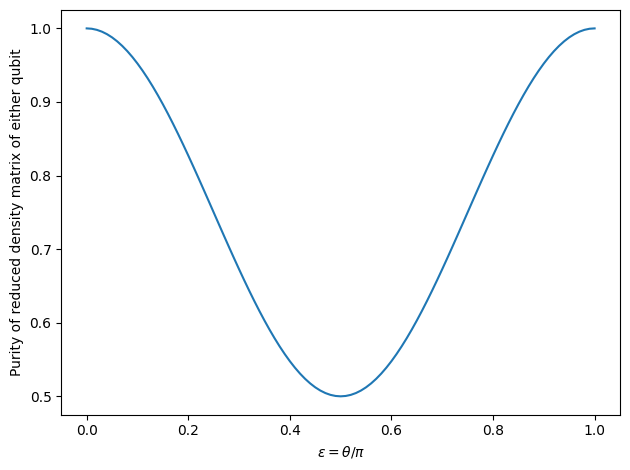

In [34]:
epsvals = np.linspace(0.0,1.0,num=101,endpoint=True)
purvals = np.zeros_like(epsvals)
calvals = np.zeros_like(epsvals)

i=0
for eps in epsvals:
    qc = QuantumCircuit(2)
    qc.ry(pi*eps,0)
    prestate = Statevector(qc)
    qc.cx(0,1)
    state = Statevector(qc)

    rho=DensityMatrix(qc)
    rhoA=partial_trace(rho, [0])
    rhoB=partial_trace(rho, [1])
    purvals[i]=rhoA.purity().real
    calvals[i]=1-0.5*(np.sin(pi*eps))**2
    
    #print(rhoA.data)
    #print(rhoB.data)
    #print((rhoA.data)@(rhoA.data))
    #print('theta = {:.2f} pi, purity = {:.4f}'.format(eps,purvals[i]))
    #print((rhoB.data)@(rhoB.data))
    #print(rhoB.purity())
    i=i+1

import matplotlib
import matplotlib.pyplot as plt

plt.figure('Varying degrees of entanglement', layout='tight')
plt.xlabel('$\\varepsilon = \\theta/\\pi$')
plt.ylabel('Purity of reduced density matrix of either qubit')
#plt.plot(epsvals,purvals)
plt.plot(epsvals,calvals)
plt.show()

In [35]:
eps = 0.25
qc = QuantumCircuit(1)
qc.ry(pi*eps,0)
unitary = Operator(qc).data
array_to_latex(unitary, prefix="RY =")

<IPython.core.display.Latex object>

In [36]:
qc = QuantumCircuit(2)
qc.ry(pi*eps,0)

unitary = Operator(qc).data
array_to_latex(unitary, prefix="I \\otimes RY =")

<IPython.core.display.Latex object>

In [37]:
qc = QuantumCircuit(2)
qc.ry(pi*eps,0)
prestate = Statevector(qc)
qc.cx(0,1)
unitary = Operator(qc).data
array_to_latex(unitary, prefix="CX(I \\otimes RY) =")

<IPython.core.display.Latex object>